# Q4

** a) y = mx + c with Random noise **

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
m = 2
c = 1
x = np.arange(50)
y_ = (m*x) + c
y = y_ + np.array([np.random.randint(-y_[i]/2, y_[i]/2) for i in range(50)])

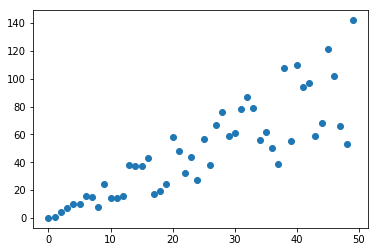

In [146]:
plt.scatter(x, y)
plt.autoscale = True
plt.show()

** b) 5 degree fit for the above data **

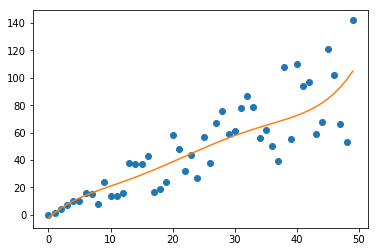

poly1d([ 4.01239969e-06, -4.54370732e-04,  1.83819468e-02, -3.21043547e-01,
        4.10778544e+00, -2.24565998e+00])

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(12)

p = np.poly1d(np.polyfit(X_train, y_train, 5))


plt.plot(x, y, 'o', x, p(x), '-')
plt.show()
p

In [162]:
y_pred = p(X_test)
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(y_pred, y_test))
error

17.705206145519664

** c) polyfit with bagging **

In [163]:
class bagpolyfit:
    
    def __init__(self):
        self.curves = []
    
    def bagging(self, n):
        indices = np.random.randint(0, n, size = (int(n*0.6),))
        return indices
            
    
    def fit(self, X, y, n_estimators = 10, n_fit = 5):
        for i in range(n_estimators):
            bag = self.bagging(len(X))
            self.curves.append(np.poly1d(np.polyfit(X[bag], y[bag], 5)))
        
    def predict(self, X_test):
        y_pred = []
        for i in range(len(self.curves)):
            y_pred.append(self.curves[0](X_test))
        y_pred = pd.DataFrame(data = y_pred)
        return np.array(y_pred.mean())        
            
            

In [171]:
model = bagpolyfit()
model.fit(X_train, y_train, 100, 5)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(y_pred, y_test))
error

14.00658154668245

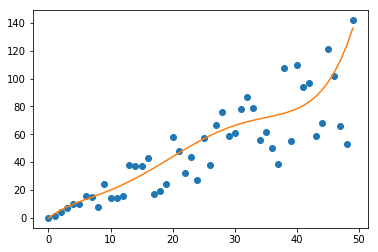

In [172]:
plt.plot(x, y, 'o', x, model.predict(x), '-')

** Observation: ** Bagging is better than the normal fitting because the bagging model has less variance than the normal fiiting.